# Corporate Bonds

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import silhouette_visualizer
from sklearn.metrics import silhouette_score

sns.set_style("whitegrid")

In [2]:
bond_data = pd.read_csv("./data/bondData.csv")
bond_data.head()

,Coupon,YTM,CurrentYield,RatingNum
0,5.65,4.024,4.5634,9
1,6.20,3.803,5.0559,11
2,1.64,1.554,1.6116,11
3,10.27,10.193,25.3518,5
4,5.83,4.479,5.1488,8


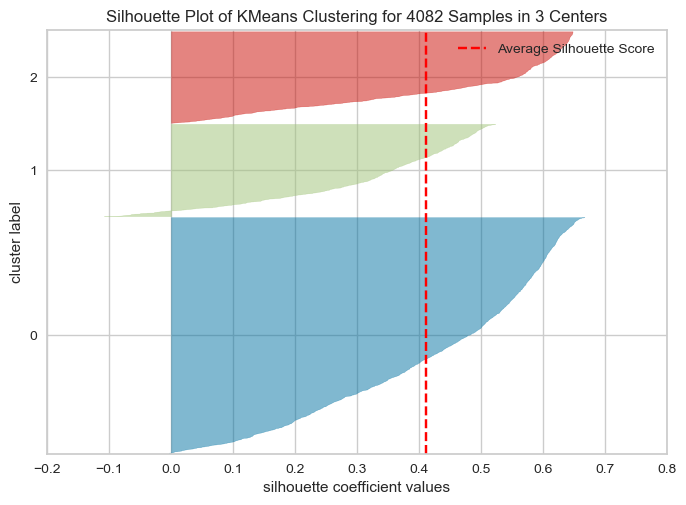

In [3]:
kmeans = KMeans(n_clusters=3, n_init='auto')

plt.figure()
silhouette_visualizer(kmeans, bond_data, colors='yellowbrick')
plt.show()

In [4]:
silhouette_scores = {}
for n_cluster in range(2, 8):
    clusterer = KMeans(n_clusters=n_cluster, n_init="auto")
    cluster_labels = clusterer.fit_predict(bond_data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(bond_data, cluster_labels)
    silhouette_scores[n_cluster] = silhouette_avg

In [5]:
print("Silhouette evaluation:", silhouette_scores)
print("Optimal number of clusters:", max(silhouette_scores, key=silhouette_scores.get))

Silhouette evaluation: {2: 0.42474686328634204, 3: 0.4111136471648442, 4: 0.39834950010483894, 5: 0.35509316127349316, 6: 0.33583336865635804, 7: 0.3428880612612565}
Optimal number of clusters: 2


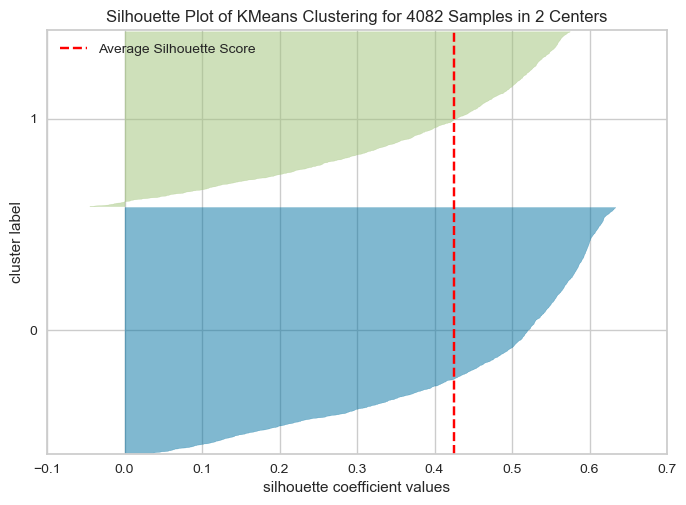

In [6]:
kmeans = KMeans(n_clusters=2, n_init='auto')

plt.figure()
silhouette_visualizer(kmeans, bond_data, colors='yellowbrick')
plt.show()